In [37]:
#!pip install --upgrade pip
!pip install tensorflow

In [38]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [31]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Каталог з даними
data_dir = 'data_october/Faulty_solar_panel'

# Використаємо ImageDataGenerator для попередньої обробки зображень
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2,  # Відокремлюємо 20% для валідації
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(150, 150),  # Розмір зображення
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(data_dir,
                                                         target_size=(150, 150),
                                                         batch_size=64,
                                                         class_mode='categorical',
                                                         subset='validation')

# Отримуємо кількість класів
classes = train_generator.class_indices
print("Класи: ", classes)


Found 711 images belonging to 6 classes.
Found 174 images belonging to 6 classes.
Класи:  {'Bird_drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical_damage': 3, 'Physical_Damage': 4, 'Snow_Covered': 5}


In [32]:
from tensorflow.keras import layers, models

# Створюємо модель CNN
model = models.Sequential()

# Згорткові та пулінг шари
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Перетворюємо у вектор та додаємо щільні шари
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))  # 6 класів

# Компіляція моделі
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Виведемо структуру моделі
model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 34, 34, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,215,238 (54.23 MB)

 Trainable params: 14,215,238 (54.23 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Навчаємо модель
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // 32,
                    epochs=70)

# Збережемо модель
model.save('faulty_solar_panel_classifier.h5')


Epoch 1/70


C:\Users\Dmitry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/22 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2194 - loss: 1.8317

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2309 - loss: 1.8182 - val_accuracy: 0.3908 - val_loss: 1.7328
Epoch 2/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.3666 - loss: 1.6596 - val_accuracy: 0.2816 - val_loss: 1.6810
Epoch 3/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3746 - loss: 1.5534 - val_accuracy: 0.3793 - val_loss: 1.4571
Epoch 4/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4310 - loss: 1.4371 - val_accuracy: 0.4138 - val_loss: 1.4385
Epoch 5/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4541 - loss: 1.4182 - val_accuracy: 0.4080 - val_loss: 1.5744
Epoch 6/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4643 - loss: 1.4121 - val_accuracy: 0.4425 - val_loss: 1.4374
Epoch 7/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.4880 - loss: 1.3519 - val_accuracy: 0.4023 - val_loss: 1.4882
Epoch 8/70
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4936 - loss: 1.3065 - val_accuracy: 0.4540 - val_loss: 1.3181
Epo

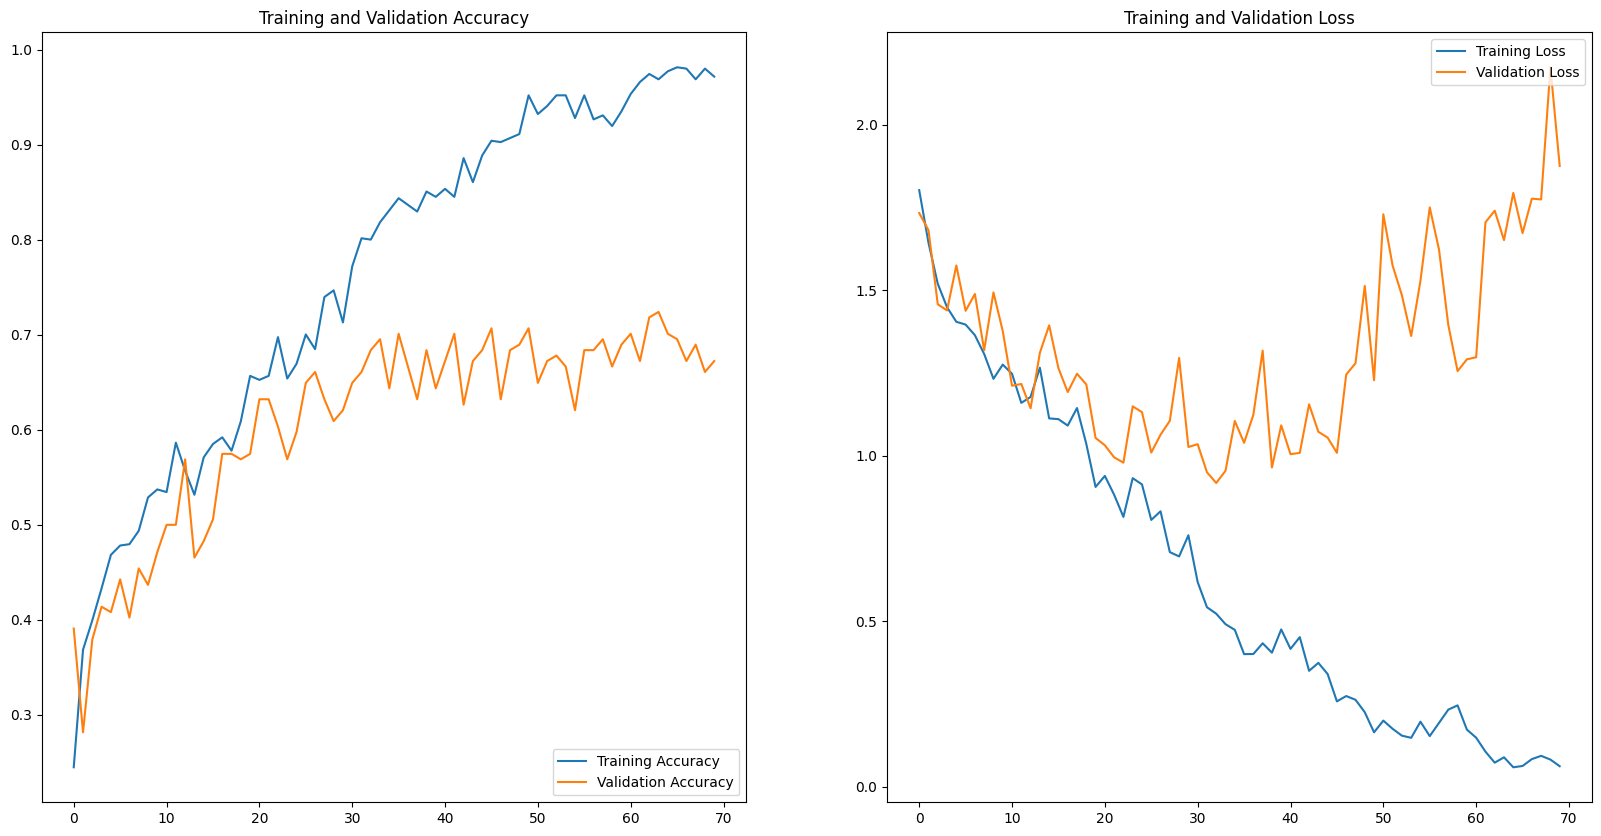

In [36]:
import matplotlib.pyplot as plt

# Побудуємо графіки втрат та точності
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(70)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


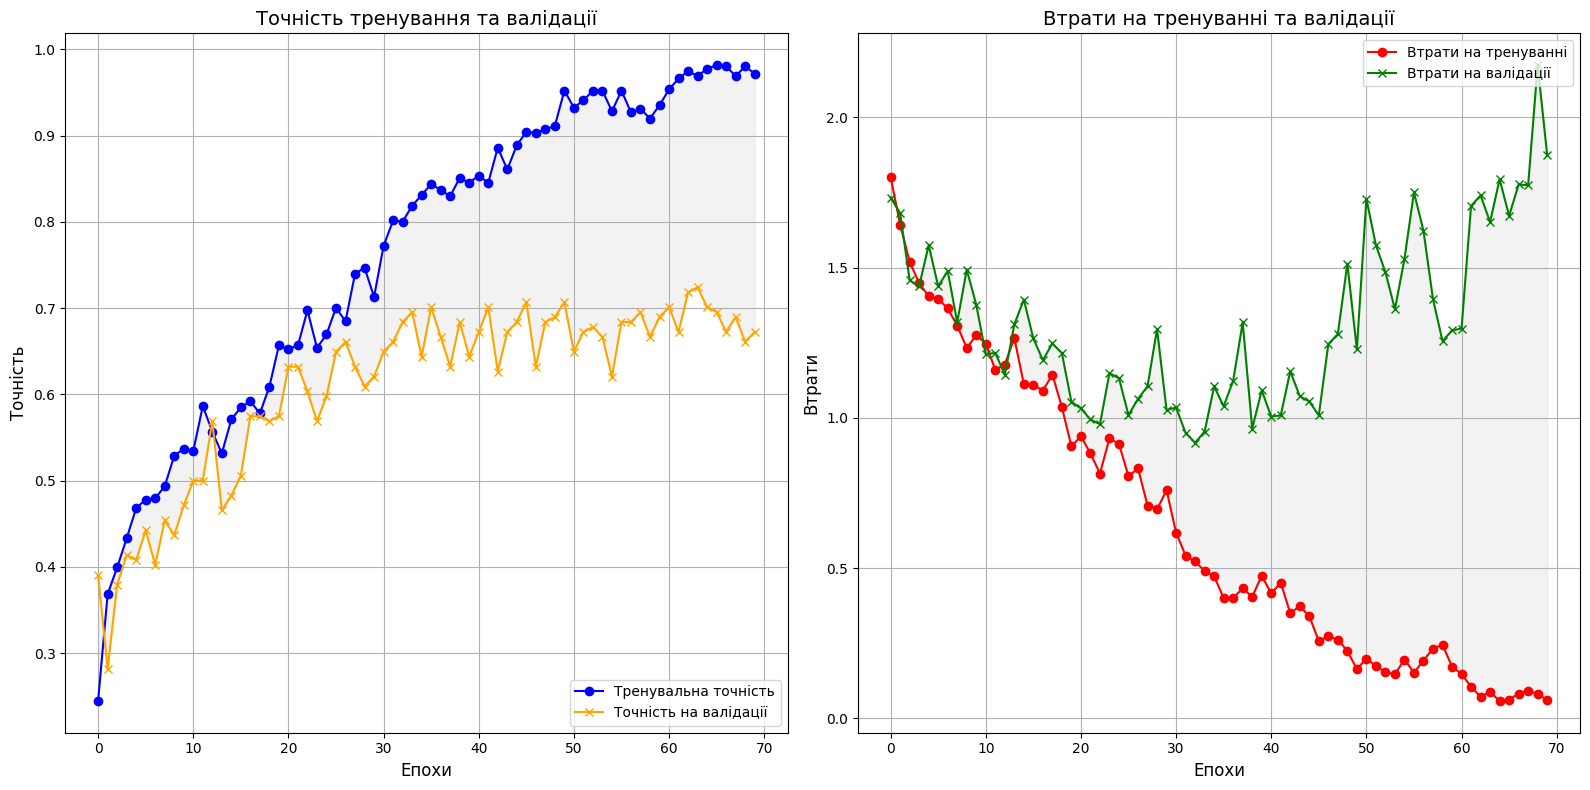

In [37]:
import matplotlib.pyplot as plt

# Побудуємо графіки втрат та точності
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))  # Автоматичне визначення кількості епох

# Налаштування розмірів фігури
plt.figure(figsize=(16, 8))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Тренувальна точність', color='blue', marker='o')
plt.plot(epochs_range, val_acc, label='Точність на валідації', color='orange', marker='x')
plt.fill_between(epochs_range, acc, val_acc, color='gray', alpha=0.1)
plt.legend(loc='lower right')
plt.title('Точність тренування та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Точність', fontsize=12)
plt.grid(True)

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на тренуванні', color='red', marker='o')
plt.plot(epochs_range, val_loss, label='Втрати на валідації', color='green', marker='x')
plt.fill_between(epochs_range, loss, val_loss, color='gray', alpha=0.1)
plt.legend(loc='upper right')
plt.title('Втрати на тренуванні та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Втрати', fontsize=12)
plt.grid(True)

# Показуємо графіки
plt.tight_layout()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


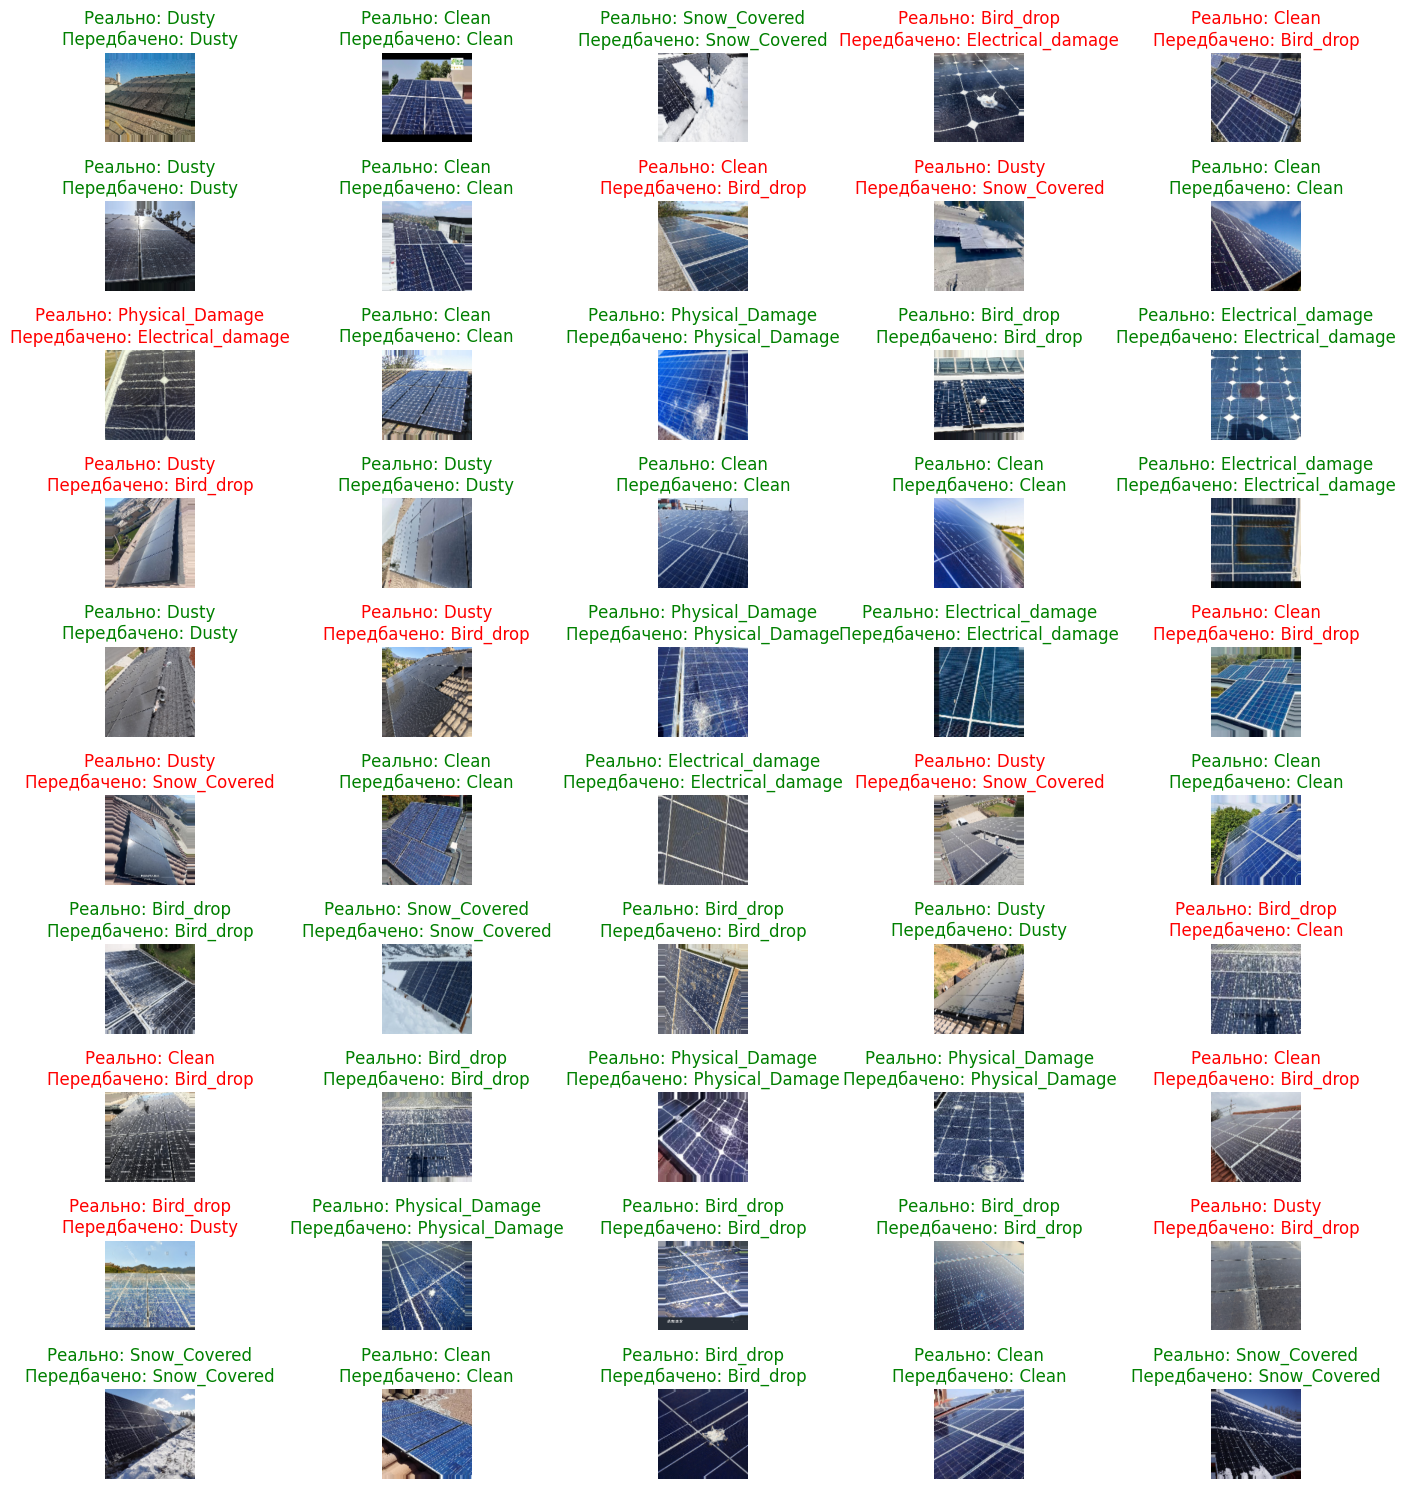

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Отримаємо зображення та мітки з генератора валідації
validation_images, validation_labels = next(validation_generator)

# Передбачення для цих зображень
predictions = model.predict(validation_images)
predicted_labels = np.argmax(predictions, axis=1)

# Реальні мітки
true_labels = np.argmax(validation_labels, axis=1)

# Візуалізуємо перші 20 зображень з передбаченнями та реальними мітками
plt.figure(figsize=(15, 15))
for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.imshow(validation_images[i])
    plt.axis('off')
    
    # Підпис на зображенні - реальний клас і передбачений
    true_label = list(classes.keys())[true_labels[i]]
    predicted_label = list(classes.keys())[predicted_labels[i]]
    
    plt.title(f"Реально: {true_label}\nПередбачено: {predicted_label}", 
              color="green" if true_label == predicted_label else "red")

plt.tight_layout()
plt.show()



In [ ]:
model.save('statja.keras')

# Кількість шарів (conv_layers):

In [ ]:
def train_with_conv_layers(conv_layers):
    # Створення моделі
    model = models.Sequential()
    model.add(layers.Input(shape=(150, 150, 3)))
    
    # Додаємо шари
    for i in range(conv_layers):
        model.add(layers.Conv2D(32 * (i + 1), (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    # Додаємо фінальні шари
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    # Компіляція моделі
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Навчання
    history = model.fit(train_generator,
                        epochs=10, 
                        batch_size=32, 
                        validation_data=validation_generator)
    
    return history


In [ ]:
history_conv_layers = train_with_conv_layers(conv_layers=3)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 27s 970ms/step - accuracy: 0.1909 - loss: 2.3998 - val_accuracy: 0.2356 - val_loss: 1.6689
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 755ms/step - accuracy: 0.3207 - loss: 1.6237 - val_accuracy: 0.3333 - val_loss: 1.4994
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 791ms/step - accuracy: 0.4315 - loss: 1.4540 - val_accuracy: 0.4310 - val_loss: 1.3170
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 733ms/step - accuracy: 0.5309 - loss: 1.2400 - val_accuracy: 0.4770 - val_loss: 1.3119
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 726ms/step - accuracy: 0.5070 - loss: 1.3003 - val_accuracy: 0.5690 - val_loss: 1.1963
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 716ms/step - accuracy: 0.5703 - loss: 1.1758 - val_accuracy: 0.5517 - val_loss: 1.2650
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 682ms/step - accuracy: 0.5957 - loss: 1.0827 - val_accuracy: 0.5632 - val_loss: 1.1255
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 697ms/step - accuracy: 0.6182 - loss: 1.0414 - val_accu

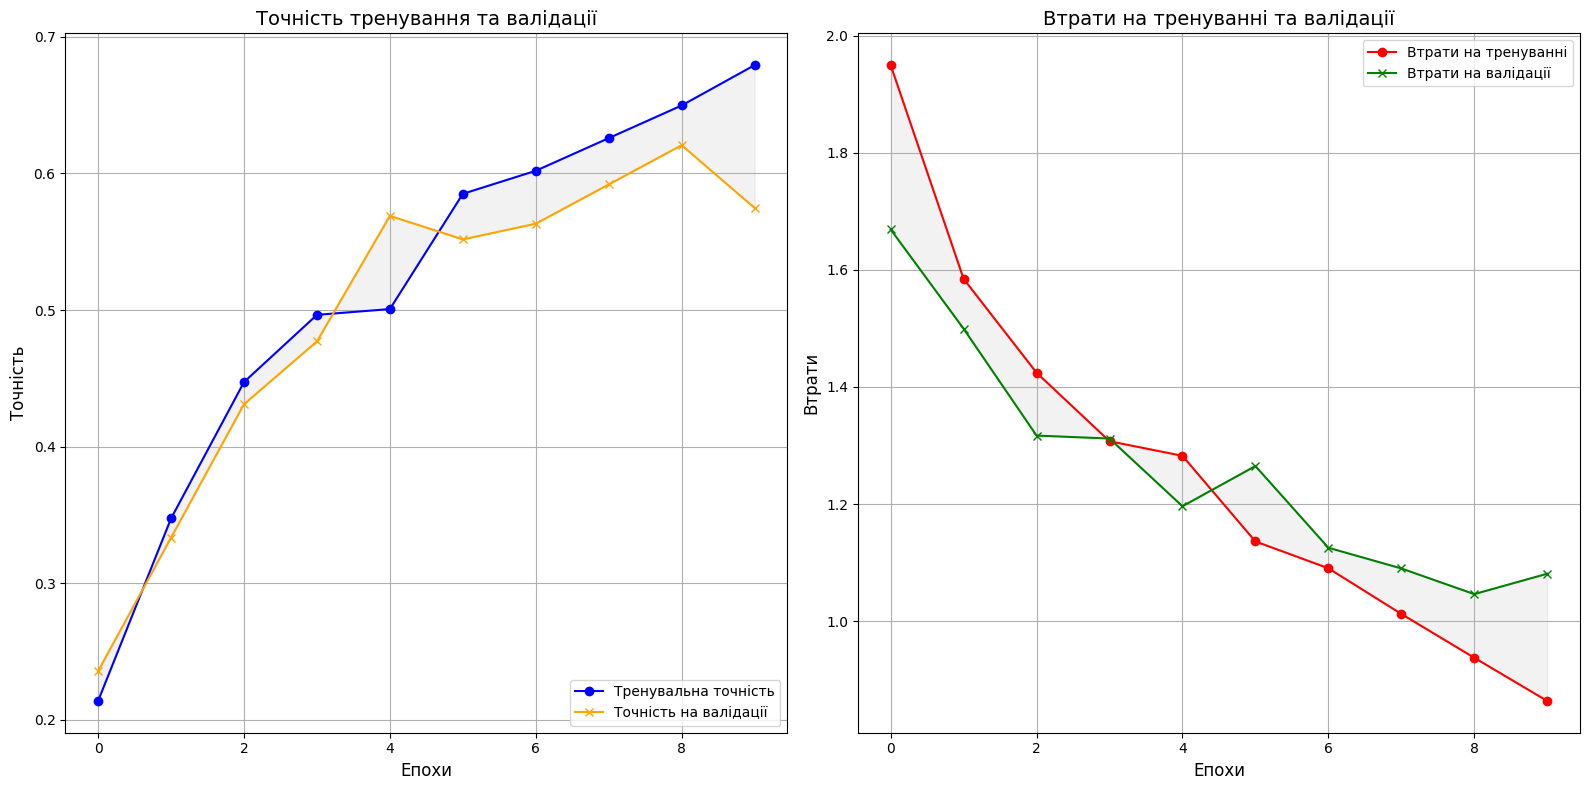

In [47]:
# Побудуємо графіки втрат та точності
acc = history_conv_layers.history['accuracy']
val_acc = history_conv_layers.history['val_accuracy']
loss = history_conv_layers.history['loss']
val_loss = history_conv_layers.history['val_loss']

epochs_range = range(len(acc))  # Автоматичне визначення кількості епох

# Налаштування розмірів фігури
plt.figure(figsize=(16, 8))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Тренувальна точність', color='blue', marker='o')
plt.plot(epochs_range, val_acc, label='Точність на валідації', color='orange', marker='x')
plt.fill_between(epochs_range, acc, val_acc, color='gray', alpha=0.1)
plt.legend(loc='lower right')
plt.title('Точність тренування та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Точність', fontsize=12)
plt.grid(True)

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на тренуванні', color='red', marker='o')
plt.plot(epochs_range, val_loss, label='Втрати на валідації', color='green', marker='x')
plt.fill_between(epochs_range, loss, val_loss, color='gray', alpha=0.1)
plt.legend(loc='upper right')
plt.title('Втрати на тренуванні та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Втрати', fontsize=12)
plt.grid(True)

# Показуємо графіки
plt.tight_layout()
plt.show()

In [42]:
import matplotlib.pyplot as plt

def train_with_conv_layers(conv_layers):
    # Створення моделі
    model = models.Sequential()
    model.add(layers.Input(shape=(150, 150, 3)))
    
    # Додаємо шари
    for i in range(conv_layers):
        model.add(layers.Conv2D(32 * (i + 1), (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    # Додаємо фінальні шари
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    # Компіляція моделі
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Навчання
    history = model.fit(train_generator,
                        epochs=10, 
                        batch_size=32, 
                        validation_data=validation_generator)
    
    # Побудова графіків
    plot_training_results(history)
    return history

def plot_training_results(history):
    # Витягуємо значення точності та втрат
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Діапазон епох
    epochs_range = range(len(acc))

    # Налаштування розмірів фігури
    plt.figure(figsize=(16, 8))

    # Графік точності
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Тренувальна точність', color='blue', marker='o')
    plt.plot(epochs_range, val_acc, label='Точність на валідації', color='orange', marker='x')
    plt.fill_between(epochs_range, acc, val_acc, color='gray', alpha=0.1)
    plt.legend(loc='lower right')
    plt.title('Точність тренування та валідації', fontsize=14)
    plt.xlabel('Епохи', fontsize=12)
    plt.ylabel('Точність', fontsize=12)
    plt.grid(True)

    # Графік втрат
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Втрати на тренуванні', color='red', marker='o')
    plt.plot(epochs_range, val_loss, label='Втрати на валідації', color='green', marker='x')
    plt.fill_between(epochs_range, loss, val_loss, color='gray', alpha=0.1)
    plt.legend(loc='upper right')
    plt.title('Втрати на тренуванні та валідації', fontsize=14)
    plt.xlabel('Епохи', fontsize=12)
    plt.ylabel('Втрати', fontsize=12)
    plt.grid(True)

    # Показуємо графіки
    plt.tight_layout()
    plt.show()


# Кількість нейронів (dense_units):

In [44]:
def train_with_dense_units(dense_units):
    # Створення моделі
    model = models.Sequential()
    model.add(layers.Input(shape=(150, 150, 3)))
    
    # Додаємо шари
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Додаємо dense шар
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    # Компіляція моделі
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Навчання
    history = model.fit(train_generator,
                        epochs=10, 
                        batch_size=32, 
                        validation_data=validation_generator)
    
    return history


In [45]:
history_dense_units = train_with_dense_units(dense_units=512)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1961 - loss: 25.3555 - val_accuracy: 0.2414 - val_loss: 1.8708
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3434 - loss: 1.7121 - val_accuracy: 0.3678 - val_loss: 1.5267
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3745 - loss: 1.5186 - val_accuracy: 0.4138 - val_loss: 1.3983
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5129 - loss: 1.2967 - val_accuracy: 0.4885 - val_loss: 1.3066
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5729 - loss: 1.1651 - val_accuracy: 0.5057 - val_loss: 1.2656
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5968 - loss: 1.1062 - val_accuracy: 0.4885 - val_loss: 1.2572
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6441 - loss: 0.9807 - val_accuracy: 0.5460 - val_loss: 1.3389
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6663 - loss: 0.9354 - val_accuracy: 0.5805 - val_loss

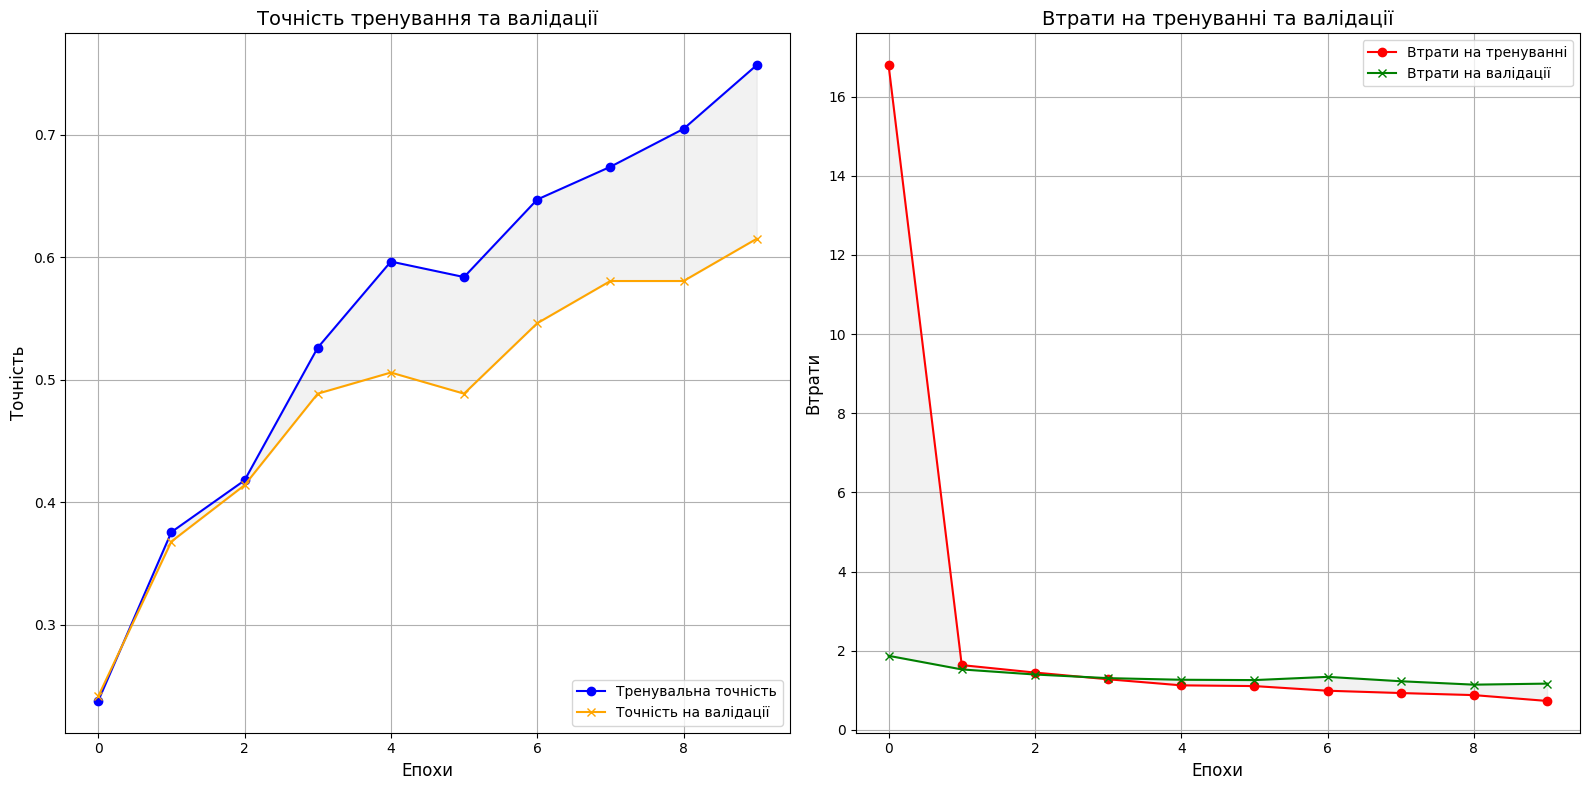

In [48]:
# Побудуємо графіки втрат та точності
acc = history_dense_units.history['accuracy']
val_acc = history_dense_units.history['val_accuracy']
loss = history_dense_units.history['loss']
val_loss = history_dense_units.history['val_loss']

epochs_range = range(len(acc))  # Автоматичне визначення кількості епох

# Налаштування розмірів фігури
plt.figure(figsize=(16, 8))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Тренувальна точність', color='blue', marker='o')
plt.plot(epochs_range, val_acc, label='Точність на валідації', color='orange', marker='x')
plt.fill_between(epochs_range, acc, val_acc, color='gray', alpha=0.1)
plt.legend(loc='lower right')
plt.title('Точність тренування та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Точність', fontsize=12)
plt.grid(True)

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на тренуванні', color='red', marker='o')
plt.plot(epochs_range, val_loss, label='Втрати на валідації', color='green', marker='x')
plt.fill_between(epochs_range, loss, val_loss, color='gray', alpha=0.1)
plt.legend(loc='upper right')
plt.title('Втрати на тренуванні та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Втрати', fontsize=12)
plt.grid(True)

# Показуємо графіки
plt.tight_layout()
plt.show()

# Функція активації (activation_fn):

In [6]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Генератор для тренувальних даних
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'path_to_train_data',  # Заміни на правильний шлях
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Генератор для валідаційних даних
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    'path_to_validation_data',  # Заміни на правильний шлях
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

def train_with_activation_fn(activation_fn):
    # Створення моделі
    model = models.Sequential()
    model.add(layers.Input(shape=(150, 150, 3)))
    
    # Додаємо шари
    model.add(layers.Conv2D(256, (3, 3), activation=activation_fn))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Додаємо dense шар
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=activation_fn))
    model.add(layers.Dense(6, activation='softmax'))
    
    # Компіляція моделі
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Навчання
    history = model.fit(train_generator,
                        epochs=10, 
                        batch_size=32, 
                        validation_data=validation_generator)
    
    return history

# Виклик функції з активацією 'tanh'
history_activation_fn = train_with_activation_fn(activation_fn='tanh')


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'path_to_train_data'

In [4]:
history_activation_fn = train_with_activation_fn(activation_fn='tanh')


NameError: name 'models' is not defined

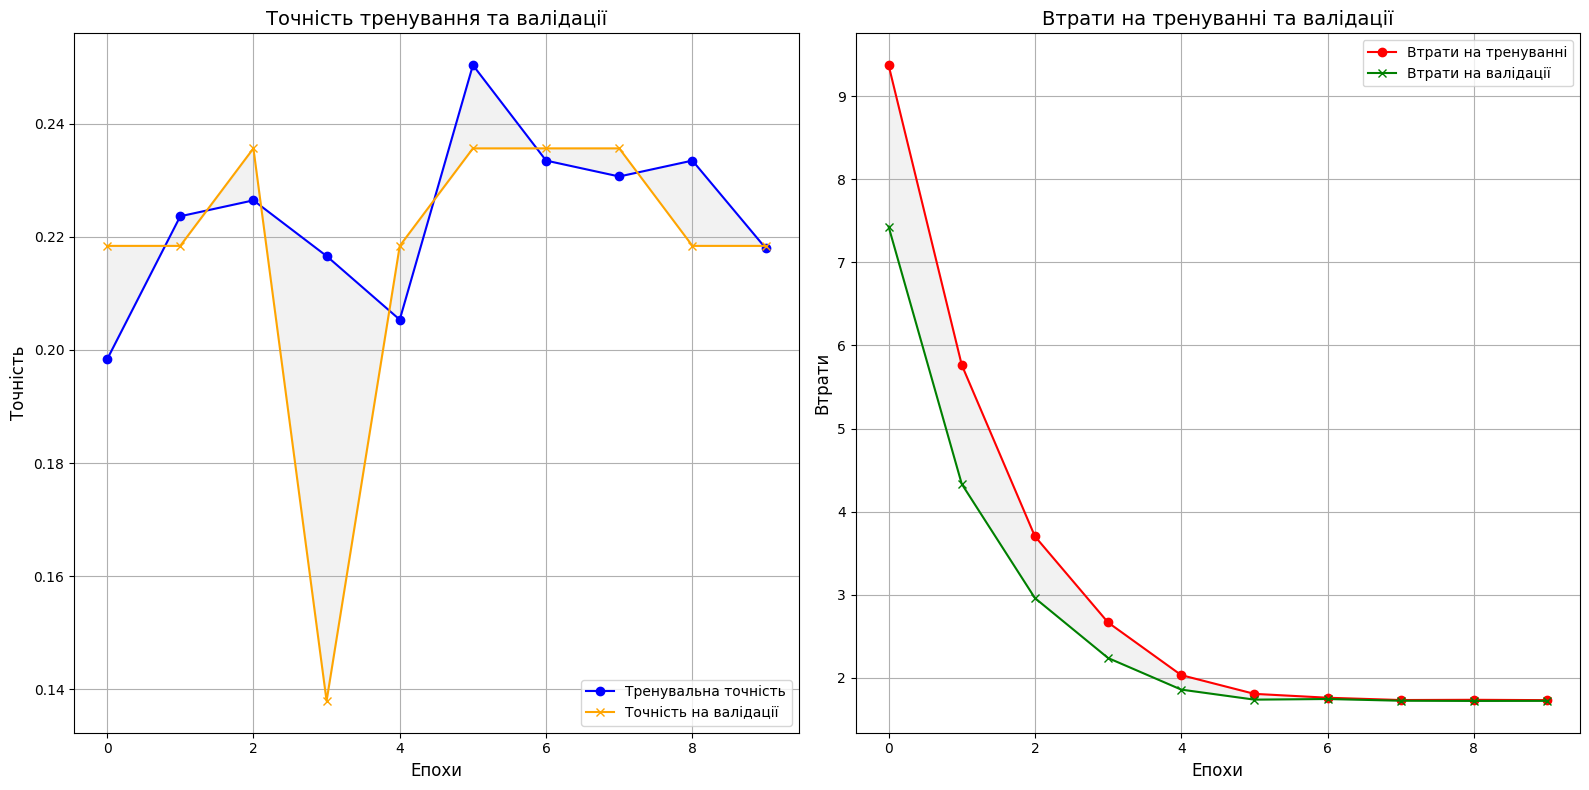

In [63]:
# Побудуємо графіки втрат та точності
acc = history_activation_fn.history['accuracy']
val_acc = history_activation_fn.history['val_accuracy']
loss = history_activation_fn.history['loss']
val_loss = history_activation_fn.history['val_loss']

epochs_range = range(len(acc))  # Автоматичне визначення кількості епох

# Налаштування розмірів фігури
plt.figure(figsize=(16, 8))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Тренувальна точність', color='blue', marker='o')
plt.plot(epochs_range, val_acc, label='Точність на валідації', color='orange', marker='x')
plt.fill_between(epochs_range, acc, val_acc, color='gray', alpha=0.1)
plt.legend(loc='lower right')
plt.title('Точність тренування та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Точність', fontsize=12)
plt.grid(True)

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на тренуванні', color='red', marker='o')
plt.plot(epochs_range, val_loss, label='Втрати на валідації', color='green', marker='x')
plt.fill_between(epochs_range, loss, val_loss, color='gray', alpha=0.1)
plt.legend(loc='upper right')
plt.title('Втрати на тренуванні та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Втрати', fontsize=12)
plt.grid(True)

# Показуємо графіки
plt.tight_layout()
plt.show()

# Оптимізатор, епохи, розмір батчу (optimizer, epochs, batch_size):

In [17]:
def train_with_conv_layers2(conv_layers):
    # Створення моделі
    model = models.Sequential()
    model.add(layers.Input(shape=(150, 150, 3)))
    
    # Додаємо шари
    for i in range(conv_layers):
        model.add(layers.Conv2D(32 * (i + 1), (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    # Додаємо фінальні шари
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    # Компіляція моделі
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Навчання
    history = model.fit(train_generator,
                        epochs=25, 
                        batch_size=128, 
                        validation_data=validation_generator)
    
    return history



In [18]:
history_conv_layers = train_with_conv_layers2(conv_layers=3)


NameError: name 'train_generator' is not defined

In [ ]:
# Побудуємо графіки втрат та точності
acc = history_optimizer.history['accuracy']
val_acc = history_optimizer.history['val_accuracy']
loss = history_optimizer.history['loss']
val_loss = history_optimizer.history['val_loss']

epochs_range = range(len(acc))  # Автоматичне визначення кількості епох

# Налаштування розмірів фігури
plt.figure(figsize=(16, 8))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Тренувальна точність', color='blue', marker='o')
plt.plot(epochs_range, val_acc, label='Точність на валідації', color='orange', marker='x')
plt.fill_between(epochs_range, acc, val_acc, color='gray', alpha=0.1)
plt.legend(loc='lower right')
plt.title('Точність тренування та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Точність', fontsize=12)
plt.grid(True)

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на тренуванні', color='red', marker='o')
plt.plot(epochs_range, val_loss, label='Втрати на валідації', color='green', marker='x')
plt.fill_between(epochs_range, loss, val_loss, color='gray', alpha=0.1)
plt.legend(loc='upper right')
plt.title('Втрати на тренуванні та валідації', fontsize=14)
plt.xlabel('Епохи', fontsize=12)
plt.ylabel('Втрати', fontsize=12)
plt.grid(True)

# Показуємо графіки
plt.tight_layout()
plt.show()

In [ ]:
def build_and_train_model(conv_layers, dense_units, activation_fn, optimizer, epochs, batch_size):
    # Створюємо модель
    model = models.Sequential()
    
    # Додаємо шар Input з визначенням input_shape
    model.add(layers.Input(shape=(150, 150, 3)))
    
    # Додаємо перший згортковий шар без input_shape
    model.add(layers.Conv2D(32, (3, 3), activation=activation_fn))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Додаємо вказану кількість згорткових шарів
    for i in range(conv_layers - 1):
        model.add(layers.Conv2D(64 * (i + 1), (3, 3), activation=activation_fn))
        model.add(layers.MaxPooling2D((2, 2)))
    
    # Перетворюємо у вектор
    model.add(layers.Flatten())
    
    # Додаємо щільний шар з певною кількістю нейронів
    model.add(layers.Dense(dense_units, activation=activation_fn))
    
    # Останній шар - softmax
    model.add(layers.Dense(6, activation='softmax'))  # 6 класів
    
    # Компіляція моделі
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    
    # Навчаємо модель
    history = model.fit(train_generator,
                        steps_per_epoch=train_generator.samples // batch_size,
                        validation_data=validation_generator,
                        validation_steps=validation_generator.samples // batch_size,
                        epochs=epochs)
    
    return history



In [ ]:
# Набори гіперпараметрів для експериментів
hyperparameters = [
    {'conv_layers': 3, 'dense_units': 256, 'activation_fn': 'relu', 'optimizer': 'adam', 'epochs': 10, 'batch_size': 32},
    {'conv_layers': 4, 'dense_units': 512, 'activation_fn': 'relu', 'optimizer': 'adam', 'epochs': 15, 'batch_size': 32},
    {'conv_layers': 3, 'dense_units': 512, 'activation_fn': 'tanh', 'optimizer': 'adam', 'epochs': 20, 'batch_size': 32},
    {'conv_layers': 4, 'dense_units': 256, 'activation_fn': 'relu', 'optimizer': 'sgd', 'epochs': 20, 'batch_size': 64},
]


In [ ]:
histories = []
for params in hyperparameters:
    print(f"Навчання моделі з гіперпараметрами: {params}")
    history = build_and_train_model(params['conv_layers'], 
                                    params['dense_units'], 
                                    params['activation_fn'], 
                                    params['optimizer'], 
                                    params['epochs'], 
                                    params['batch_size'])
    histories.append(history)


Навчання моделі з гіперпараметрами: {'conv_layers': 3, 'dense_units': 256, 'activation_fn': 'relu', 'optimizer': 'adam', 'epochs': 10, 'batch_size': 32}
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 869ms/step - accuracy: 0.1977 - loss: 2.2479 - val_accuracy: 0.2375 - val_loss: 1.7168
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0938 - loss: 1.7868 - val_accuracy: 0.0714 - val_loss: 1.7824
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 712ms/step - accuracy: 0.2656 - loss: 1.7169 - val_accuracy: 0.3500 - val_loss: 1.6023
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3438 - loss: 1.5827 - val_accuracy: 0.7143 - val_loss: 1.1838
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 721ms/step - accuracy: 0.4354 - loss: 1.5027 - val_accuracy: 0.3187 - val_loss: 1.6168
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 1.4708 - val_accuracy: 0.5000 - val_loss: 1.2260
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 695ms/step - accuracy: 0.4662 - loss: 1

AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Каталог з даними
data_dir = 'data_october/Faulty_solar_panel'

# Використаємо ImageDataGenerator для попередньої обробки зображень
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2,  # Відокремлюємо 20% для валідації
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(150, 150),  # Розмір зображення
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(data_dir,
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         subset='validation')

# Отримуємо кількість класів
classes = train_generator.class_indices
print("Класи: ", classes)


from tensorflow.keras import layers, models

# Створюємо модель CNN
model = models.Sequential()

# Згорткові та пулінг шари
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Перетворюємо у вектор та додаємо щільні шари
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))  # 6 класів

# Компіляція моделі
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Виведемо структуру моделі
model.summary()

# Навчаємо модель
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // 32,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // 32,


import matplotlib.pyplot as plt

# Побудуємо графіки втрат та точності
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()





